In [1]:
pip install ludwig pyyaml ptitprince pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metad

In [2]:
import pandas as pd
df = pd.read_csv('insurance_claim_status.csv')
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


# Step 4
We will import the insurance_claim_status.csv” data as a pandas data frame. Add a new code cell, Copy or type the following code in the code cell and execute it.

In [3]:
import pandas as pd
df = pd.read_csv('insurance_claim_status.csv')
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


# Step 6
Type the following code to import the required model and train a model. Simple commands can be used to train models and predict new data.

In [7]:
from ludwig.api import LudwigModel
model = LudwigModel(config="model_definition.yaml")
model.train(dataset=df)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  return F.conv1d(input, weight, bias, self.stride,


TrainingResults(train_stats=TrainingStats(training={'claim': {'loss': [17.940628051757812, 1.9620184898376465, 0.5789260268211365, 0.3537836968898773, 0.3187316060066223, 0.1865796595811844, 0.23435257375240326, 0.1862451434135437, 0.15931792557239532, 0.2072911560535431, 0.14800700545310974, 0.13528503477573395, 0.13613642752170563, 0.14270193874835968, 0.11853449046611786, 0.11911597102880478], 'mean_absolute_error': [3.3223354816436768, 1.2500216960906982, 0.6618169546127319, 0.5116139650344849, 0.4543042480945587, 0.3281697928905487, 0.41176578402519226, 0.3525409400463104, 0.2853888273239136, 0.33702635765075684, 0.2909836769104004, 0.29160457849502563, 0.28882932662963867, 0.28455761075019836, 0.24364246428012848, 0.24343425035476685], 'mean_absolute_percentage_error': [2208450.75, 798067.375, 455857.59375, 324790.5, 217456.5, 152819.09375, 263575.78125, 202133.234375, 122407.0390625, 143249.71875, 146108.15625, 148933.515625, 155711.90625, 142610.765625, 107505.75, 109639.359375

# Step 7
Type the following code to run the prediction on the trained model.

In [8]:
predictions, _ = model.predict(dataset='insurance_claim_status.csv')
predictions.head()

,claim_predictions
0,0.391799
1,0.056107
2,0.059617
3,0.051824
4,0.143092


# Step 8
Type the following code to run an evaluation on the trained model.

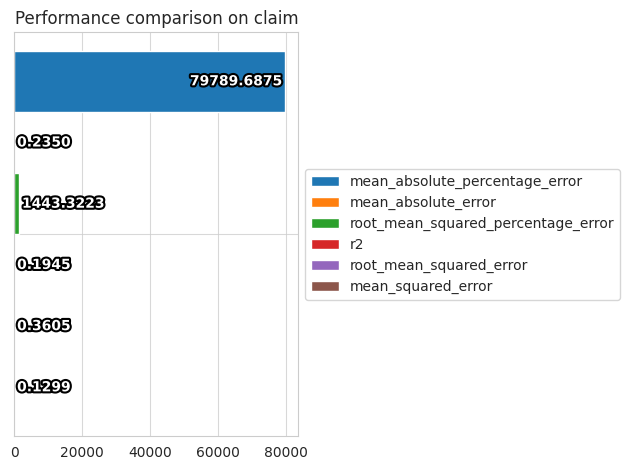

In [9]:
from ludwig.visualize import compare_performance
eval_stats, _, _ = model.evaluate(dataset='insurance_claim_status.csv')
compare_performance([eval_stats])